[website for data set](https://www.gutenberg.org/browse/scores/top)

[dataset](https://www.gutenberg.org/ebooks/1342)

[data](https://www.gutenberg.org/ebooks/1342.txt.utf-8)

[video](https://www.youtube.com/watch?v=VB7bbFIEAhk)

[.](https://ishwargautam.blogspot.com/2021/07/next-word-prediction-using-lstm.html)

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense, Flatten
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import pickle
import numpy as np
import os
import matplotlib.pyplot as plt
from keras import backend as K

In [27]:
contextSize = 3 # window size equal to contextSize-1

In [ ]:
# file = open("/kaggle/input/dataset-word-prediction/train.txt", "r", encoding = "utf8")
file = open("/kaggle/working/data.txt", "r", encoding = "utf8")
# store file in list
lines = []
for i in file:
    lines.append(i)

# Convert list to string
data = ""
for i in lines:
  data = ' '. join(lines) 

#replace unnecessary stuff with space
data = data.replace('\n', '').replace('\r', '').replace('\ufeff', '').replace('“','').replace('”','')  #new line, carriage return, unicode character --> replace by space

#remove unnecessary spaces 
data = data.split()
data = ' '.join(data)
data[:500]


In [27]:
file = open("/kaggle/input/dataset-word-prediction/test.txt", "r", encoding = "utf8")
# file = open("/kaggle/working/data.txt", "r", encoding = "utf8")
# store file in list
lines = []
for i in file:
    lines.append(i)

# Convert list to string
test_data = ""
for i in lines:
    test_data = ' '. join(lines) 

#replace unnecessary stuff with space
test_data = test_data.replace('\n', '').replace('\r', '').replace('\ufeff', '').replace('“','').replace('”','')  #new line, carriage return, unicode character --> replace by space

#remove unnecessary spaces 
test_data = test_data.split()
test_data = ' '.join(test_data)
test_data[:500]


'The universe is not awry. Fate and man are not altogether at odds. Yet there is a perpetual combat going on between man and nature, and between the power of character and the tyranny of circumstance, death, and sin. The great soul is tossed into the midst of the strife, the longing, and the aspirations of the world. He rises Victor who is triumphant in some great experience of the race. The first energy is combative: the Warrior is the primitive hero. There are natures to whom mere combat is a j'

In [28]:
!touch test_data.txt

In [29]:

file = open("/kaggle/working/test_data.txt", "w+")


file.write(test_data)
file.close()

In [5]:
file = open("/kaggle/working/data.txt", "r")
data = file.read()[:20000]

print("Array contents in sample.txt: ", data[:500])
file.close()

Array contents in sample.txt:  Many are the hours in which I have pondered upon the story that is set forth in the following pages. I trust that my instincts are not awry when they prompt me to leave the account, in simplicity, as it was handed to me. And the MS. itself--You must picture me, when first it was given into my care, turning it over, curiously, and making a swift, jerky examination. A small book it is; but thick, and all, save the last few pages, filled with a quaint but legible handwriting, and writ very close. I


In [30]:
file = open("/kaggle/working/test_data.txt", "r")
data = file.read()

print("Array contents in sample.txt: ", data[:500])
file.close()

Array contents in sample.txt:  The universe is not awry. Fate and man are not altogether at odds. Yet there is a perpetual combat going on between man and nature, and between the power of character and the tyranny of circumstance, death, and sin. The great soul is tossed into the midst of the strife, the longing, and the aspirations of the world. He rises Victor who is triumphant in some great experience of the race. The first energy is combative: the Warrior is the primitive hero. There are natures to whom mere combat is a j


In [31]:
len(data)

125544

In [7]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])

# saving the tokenizer for predict function
pickle.dump(tokenizer, open('token.pkl', 'wb'))

sequence_data = tokenizer.texts_to_sequences([data])[0]
sequence_data[:15]

[118, 236, 1, 382, 8, 28, 5, 47, 383, 26, 1, 97, 9, 48, 151]

# to run below cell use test data

In [32]:
# to run this cell use test data
sequence_data = tokenizer.texts_to_sequences([data])[0]
sequence_data[:15]

[1, 48, 30, 387, 2, 306, 236, 30, 18, 74, 19, 48, 6, 356, 22]

In [34]:
tokenizer.word_index

{'the': 1,
 'and': 2,
 'of': 3,
 'to': 4,
 'i': 5,
 'a': 6,
 'we': 7,
 'in': 8,
 'that': 9,
 'it': 10,
 'was': 11,
 'he': 12,
 'had': 13,
 'as': 14,
 'our': 15,
 'my': 16,
 'tonnison': 17,
 'at': 18,
 'there': 19,
 'for': 20,
 'with': 21,
 'on': 22,
 'then': 23,
 'were': 24,
 'his': 25,
 'upon': 26,
 'from': 27,
 'which': 28,
 'me': 29,
 'not': 30,
 'so': 31,
 'out': 32,
 'one': 33,
 'came': 34,
 'this': 35,
 'said': 36,
 'among': 37,
 'went': 38,
 'trees': 39,
 'into': 40,
 'but': 41,
 'be': 42,
 'place': 43,
 'or': 44,
 'though': 45,
 'something': 46,
 'have': 47,
 'is': 48,
 'they': 49,
 'all': 50,
 'now': 51,
 'looked': 52,
 'no': 53,
 'where': 54,
 'great': 55,
 'some': 56,
 'us': 57,
 'could': 58,
 'up': 59,
 'having': 60,
 'by': 61,
 'come': 62,
 'made': 63,
 'what': 64,
 'over': 65,
 'see': 66,
 'away': 67,
 'river': 68,
 'after': 69,
 'more': 70,
 'an': 71,
 'bushes': 72,
 'their': 73,
 'yet': 74,
 'rock': 75,
 'did': 76,
 'put': 77,
 'while': 78,
 'down': 79,
 'about': 80,
 '

In [35]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

1114


# to run below cell use test data & train

In [37]:
sequences = []

for i in range(3, len(sequence_data)):
    words = sequence_data[i-3:i+1]
    sequences.append(words)
    
print("The Length of sequences are: ", len(sequences))
sequences = np.array(sequences)
sequences[:10]

The Length of sequences are:  10269


array([[  1,  48,  30, 387],
       [ 48,  30, 387,   2],
       [ 30, 387,   2, 306],
       [387,   2, 306, 236],
       [  2, 306, 236,  30],
       [306, 236,  30,  18],
       [236,  30,  18,  74],
       [ 30,  18,  74,  19],
       [ 18,  74,  19,  48],
       [ 74,  19,  48,   6]])

In [38]:
X = []
y = []

for i in sequences:
    X.append(i[0:3])
    y.append(i[3])
    
X = np.array(X)
y = np.array(y)

y = to_categorical(y, num_classes=vocab_size,dtype='int8')
y[:5]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int8)

In [39]:
max_seq_length = max([len(x) for x in sequences])

In [40]:
print(max_seq_length)

4


In [41]:
path = '/kaggle/working/glove.6B.50d.txt'
embeddings_index = {}
with open(path) as f:
  for line in f:
    values = line.split()
    word = values[0]
    coeffs = np.array(values[1:], dtype='float32')
    embeddings_index[word] = coeffs
dict(list(embeddings_index.items())[0:2])

{'the': array([ 4.1800e-01,  2.4968e-01, -4.1242e-01,  1.2170e-01,  3.4527e-01,
        -4.4457e-02, -4.9688e-01, -1.7862e-01, -6.6023e-04, -6.5660e-01,
         2.7843e-01, -1.4767e-01, -5.5677e-01,  1.4658e-01, -9.5095e-03,
         1.1658e-02,  1.0204e-01, -1.2792e-01, -8.4430e-01, -1.2181e-01,
        -1.6801e-02, -3.3279e-01, -1.5520e-01, -2.3131e-01, -1.9181e-01,
        -1.8823e+00, -7.6746e-01,  9.9051e-02, -4.2125e-01, -1.9526e-01,
         4.0071e+00, -1.8594e-01, -5.2287e-01, -3.1681e-01,  5.9213e-04,
         7.4449e-03,  1.7778e-01, -1.5897e-01,  1.2041e-02, -5.4223e-02,
        -2.9871e-01, -1.5749e-01, -3.4758e-01, -4.5637e-02, -4.4251e-01,
         1.8785e-01,  2.7849e-03, -1.8411e-01, -1.1514e-01, -7.8581e-01],
       dtype=float32),
 ',': array([ 0.013441,  0.23682 , -0.16899 ,  0.40951 ,  0.63812 ,  0.47709 ,
        -0.42852 , -0.55641 , -0.364   , -0.23938 ,  0.13001 , -0.063734,
        -0.39575 , -0.48162 ,  0.23291 ,  0.090201, -0.13324 ,  0.078639,
        -0.4

In [42]:
embeddings_matrix = np.zeros((vocab_size, 50))
for word, i in tokenizer.word_index.items():
   embedding_vector = embeddings_index.get(word)
   if embedding_vector is not None:
     embeddings_matrix[i] = embedding_vector;

In [44]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
# max_seq_length = max([len(x) for x in input_sequences])
# max_seq_length = 20
input_seqs = np.array(pad_sequences(sequences, maxlen=max_seq_length, padding='pre'))

print(input_seqs[11])

[ 48   6 356  22]


In [18]:
X_train, labels = input_seqs[:, :-1], input_seqs[:, -1]
y_train = tf.keras.utils.to_categorical(labels, num_classes=vocab_size)

# to run below cell use test data 

In [45]:
X_test, labels = input_seqs[:, :-1], input_seqs[:, -1]
y_test = tf.keras.utils.to_categorical(labels, num_classes=vocab_size)

In [46]:
sequences[11]

array([ 48,   6, 356,  22])

In [47]:
input_seqs[11]

array([ 48,   6, 356,  22], dtype=int32)

In [ ]:
# !pip install gdown
# !gdown --id 1kqbSRxDRxuvs_O7BbyDngj-kHNnjiKxk


In [29]:
# !mkdir checkpoint

In [23]:
def create_model(number_of_neuron=35,learn_rate=0.02,number_of_epoch=100):
    model = Sequential()

    model.add(Embedding(input_dim = vocab_size, output_dim=50,
               weights=[embeddings_matrix],
               input_length=4-1, trainable=False))
    model.add(Flatten())
    model.add(Dense(number_of_neuron, activation="relu"))
    model.add(Dense(vocab_size, activation="softmax"))

    model.summary() 
    
    EarlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                min_delta=0, 
                                                patience=6, 
                                                verbose=1)
    check_pointName = f"checkpoint/part_one_lr({learn_rate})_e({number_of_epoch})_n{number_of_neuron}.h5"
    checkpoint = ModelCheckpoint(check_pointName, monitor='loss',
                                 verbose=1, save_best_only=True)
    model.compile(loss="categorical_crossentropy",
                  optimizer=Adam(learning_rate=learn_rate),
                  metrics= ['accuracy'])
    
    
    perplexities = []

    # Train the model and calculate perplexity at the end of each epoch
    for epoch in range(number_of_epoch):
        history = model.fit(X_train, y_train, epochs=1, batch_size=64,
                            callbacks=[checkpoint,EarlyStopping] , validation_split=0.2)
        loss = history.history['loss'][0]
        perplexity = np.exp(loss)
        perplexities.append(perplexity)
        print(f"Epoch {epoch+1}: Perplexity = {perplexity:.2f}")

    # Plot the perplexity vs epoch number
    plt.plot(range(1, len(perplexities)+1), perplexities)
    plt.xlabel('Epoch')
    plt.ylabel('Perplexity')
    plt.show()
    
    return model

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 3, 50)             55700     
                                                                 
 flatten_9 (Flatten)         (None, 150)               0         
                                                                 
 dense_18 (Dense)            (None, 35)                5285      
                                                                 
 dense_19 (Dense)            (None, 1114)              40104     
                                                                 
Total params: 101,089
Trainable params: 45,389
Non-trainable params: 55,700
_________________________________________________________________
37/46 [=======================>......] - ETA: 0s - loss: 6.2971 - accuracy: 0.0722   
Epoch 1: loss improved from inf to 6.28116, saving model to checkpoint/part_one_lr(0.02)_e

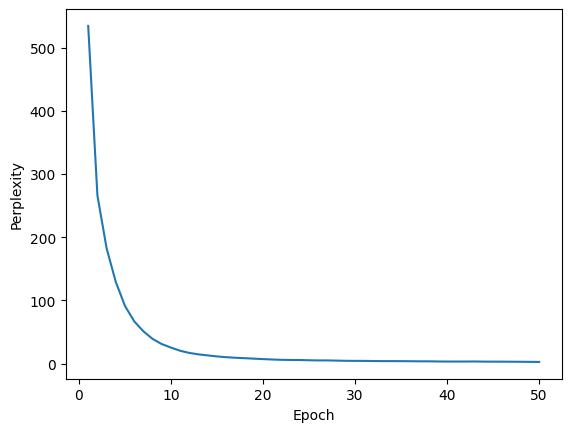

In [76]:
create_model(35,0.02,50)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 3, 50)             55700     
                                                                 
 flatten_10 (Flatten)        (None, 150)               0         
                                                                 
 dense_20 (Dense)            (None, 35)                5285      
                                                                 
 dense_21 (Dense)            (None, 1114)              40104     
                                                                 
Total params: 101,089
Trainable params: 45,389
Non-trainable params: 55,700
_________________________________________________________________
39/46 [========================>.....] - ETA: 0s - loss: 6.3322 - accuracy: 0.0593   
Epoch 1: loss improved from inf to 6.30784, saving model to checkpoint/part_one_lr(0.01)_

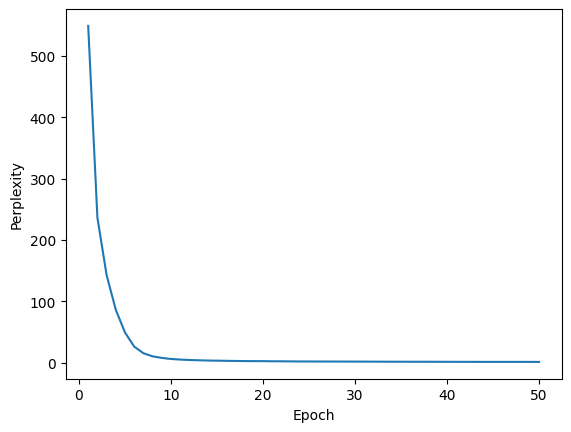

In [77]:
create_model(35,0.01,50)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 3, 50)             55700     
                                                                 
 flatten_11 (Flatten)        (None, 150)               0         
                                                                 
 dense_22 (Dense)            (None, 35)                5285      
                                                                 
 dense_23 (Dense)            (None, 1114)              40104     
                                                                 
Total params: 101,089
Trainable params: 45,389
Non-trainable params: 55,700
_________________________________________________________________
36/46 [======================>.......] - ETA: 0s - loss: 6.3549 - accuracy: 0.0625   
Epoch 1: loss improved from inf to 6.32968, saving model to checkpoint/part_one_lr(0.03)_

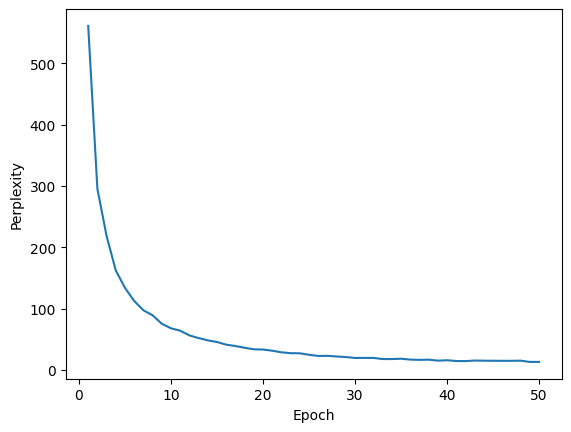

In [78]:
create_model(35,0.03,50)

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 3, 50)             55700     
                                                                 
 flatten_12 (Flatten)        (None, 150)               0         
                                                                 
 dense_24 (Dense)            (None, 35)                5285      
                                                                 
 dense_25 (Dense)            (None, 1114)              40104     
                                                                 
Total params: 101,089
Trainable params: 45,389
Non-trainable params: 55,700
_________________________________________________________________
38/46 [=======================>......] - ETA: 0s - loss: 6.5517 - accuracy: 0.0354   
Epoch 1: loss improved from inf to 6.50875, saving model to checkpoint/part_one_lr(0.1)_e

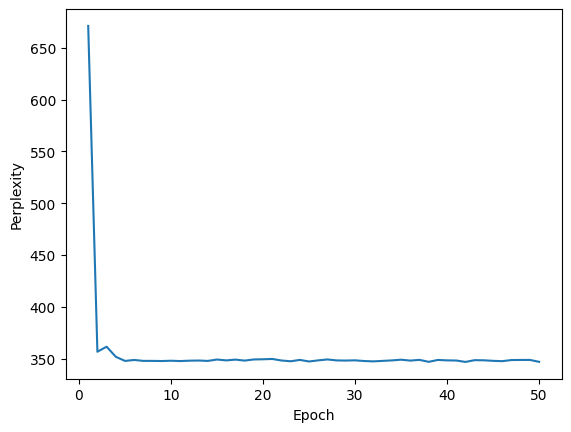

In [79]:
create_model(35,0.1,50)

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, 3, 50)             55700     
                                                                 
 flatten_13 (Flatten)        (None, 150)               0         
                                                                 
 dense_26 (Dense)            (None, 50)                7550      
                                                                 
 dense_27 (Dense)            (None, 1114)              56814     
                                                                 
Total params: 120,064
Trainable params: 64,364
Non-trainable params: 55,700
_________________________________________________________________
36/46 [======================>.......] - ETA: 0s - loss: 6.3361 - accuracy: 0.0690   
Epoch 1: loss improved from inf to 6.30728, saving model to checkpoint/part_one_lr(0.02)_

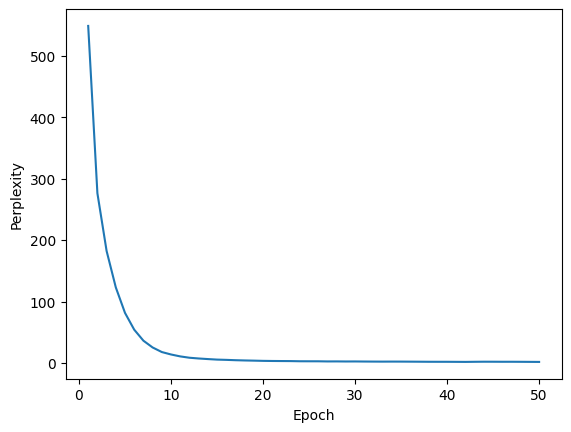

In [80]:
create_model(50,0.02,50)

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_14 (Embedding)    (None, 3, 50)             55700     
                                                                 
 flatten_14 (Flatten)        (None, 150)               0         
                                                                 
 dense_28 (Dense)            (None, 100)               15100     
                                                                 
 dense_29 (Dense)            (None, 1114)              112514    
                                                                 
Total params: 183,314
Trainable params: 127,614
Non-trainable params: 55,700
_________________________________________________________________
43/46 [===========================>..] - ETA: 0s - loss: 6.2509 - accuracy: 0.0574 
Epoch 1: loss improved from inf to 6.24702, saving model to checkpoint/part_one_lr(0.02)_e

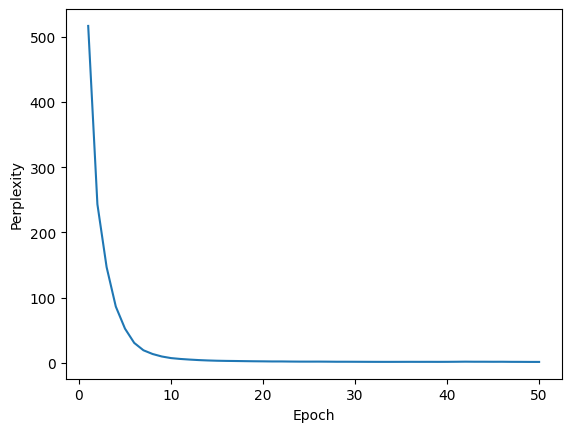

In [81]:
create_model(100,0.02,50)

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_15 (Embedding)    (None, 3, 50)             55700     
                                                                 
 flatten_15 (Flatten)        (None, 150)               0         
                                                                 
 dense_30 (Dense)            (None, 150)               22650     
                                                                 
 dense_31 (Dense)            (None, 1114)              168214    
                                                                 
Total params: 246,564
Trainable params: 190,864
Non-trainable params: 55,700
_________________________________________________________________
42/46 [==========================>...] - ETA: 0s - loss: 6.2527 - accuracy: 0.0759 
Epoch 1: loss improved from inf to 6.25258, saving model to checkpoint/part_one_lr(0.02)_e

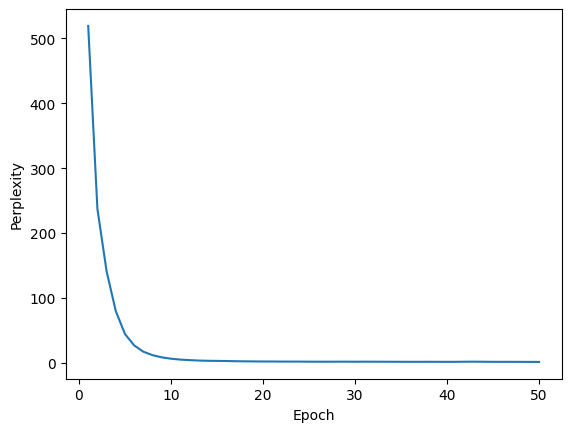

In [82]:
create_model(150,0.02,50)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 3, 50)             55700     
                                                                 
 flatten_2 (Flatten)         (None, 150)               0         
                                                                 
 dense_2 (Dense)             (None, 150)               22650     
                                                                 
 dense_3 (Dense)             (None, 1114)              168214    
                                                                 
Total params: 246,564
Trainable params: 190,864
Non-trainable params: 55,700
_________________________________________________________________
40/46 [=========================>....] - ETA: 0s - loss: 6.2509 - accuracy: 0.0668 
Epoch 1: loss improved from inf to 6.25272, saving model to checkpoint/part_one_lr(0.02)_e(

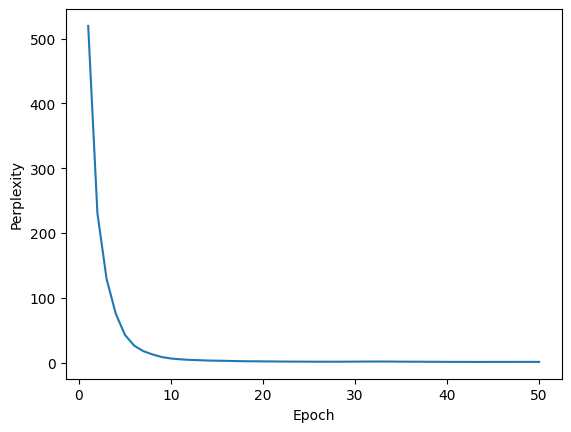

In [55]:
model1 = create_model(150,0.02,50)

# **part2**

In [ ]:
vocab_size

In [24]:

model2 = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(3,)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Embedding(vocab_size, 50, input_length=3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(35, activation='relu'),
    tf.keras.layers.Dense(vocab_size, activation='softmax')
])
model2.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3)                 0         
                                                                 
 embedding (Embedding)       (None, 3, 50)             55700     
                                                                 
 flatten_1 (Flatten)         (None, 150)               0         
                                                                 
 dense (Dense)               (None, 35)                5285      
                                                                 
 dense_1 (Dense)             (None, 1114)              40104     
                                                                 
Total params: 101,089
Trainable params: 101,089
Non-trainable params: 0
_________________________________________________________________


In [25]:
checkpoint2 = ModelCheckpoint("part_two.h5", monitor='loss', verbose=1, save_best_only=True)
model2.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.02), metrics=['accuracy'])

47/58 [=======================>......] - ETA: 0s - loss: 6.3367 - accuracy: 0.0731 
Epoch 1: loss improved from inf to 6.28470, saving model to part_two.h5
58/58 [==============================] - 1s 4ms/step - loss: 6.2847 - accuracy: 0.0757
Epoch 1: Perplexity = 536.31
51/58 [=========================>....] - ETA: 0s - loss: 5.2267 - accuracy: 0.1127
Epoch 1: loss improved from 6.28470 to 5.23343, saving model to part_two.h5
58/58 [==============================] - 0s 3ms/step - loss: 5.2334 - accuracy: 0.1113
Epoch 2: Perplexity = 187.43
53/58 [==========================>...] - ETA: 0s - loss: 4.4382 - accuracy: 0.1739
Epoch 1: loss improved from 5.23343 to 4.44640, saving model to part_two.h5
58/58 [==============================] - 0s 3ms/step - loss: 4.4464 - accuracy: 0.1739
Epoch 3: Perplexity = 85.32
53/58 [==========================>...] - ETA: 0s - loss: 3.6853 - accuracy: 0.2712
Epoch 1: loss improved from 4.44640 to 3.71223, saving model to part_two.h5
58/58 [=============

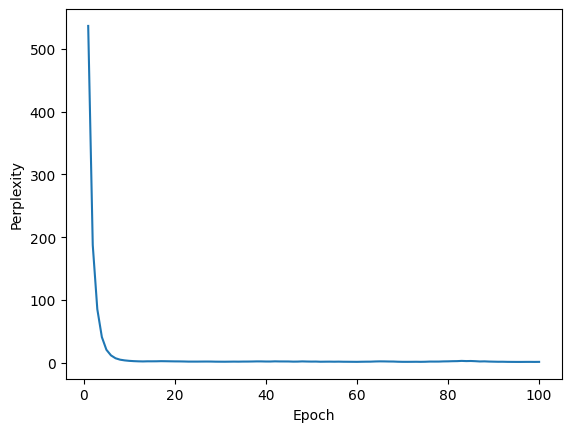

In [26]:
perplexities2 = []

# Train the model and calculate perplexity at the end of each epoch
for epoch in range(100):
    history2 = model2.fit(X_train, y_train, epochs=1, batch_size=64, callbacks=[checkpoint2])
    loss2 = history2.history['loss'][0]
    perplexity2 = np.exp(loss2)
    perplexities2.append(perplexity2)
    print(f"Epoch {epoch+1}: Perplexity = {perplexity2:.2f}")

# Plot the perplexity vs epoch number
plt.plot(range(1, len(perplexities2)+1), perplexities2)
plt.xlabel('Epoch')
plt.ylabel('Perplexity')
plt.show()

# predict & generate text

In [89]:
# predicted_word = ''
# text = "many are the"
def Predict_Next_Words(model, tokenizer, text):

  sequence = tokenizer.texts_to_sequences([text])
  sequence = np.array(sequence)
  preds = np.argmax(model.predict(sequence))
  predicted_word = ""
  
  for key, value in tokenizer.word_index.items():
      if value == preds:
          predicted_word = key
          break
  
  print(type(predicted_word),"  ",predicted_word)
  return predicted_word


def generate_text(number_of_generate_word=50,model=model1, tokenizer=tokenizer, in_text="many are the"):
    i=0
    final_result = in_text
    while i<number_of_generate_word:

        result = Predict_Next_Words(model, tokenizer, in_text)
        print(result)
        final_result = final_result + " " + result
        in_text = in_text + " " + result
        in_text = in_text.split(" ")
        in_text = in_text[-3:]
    #     print(type(in_text))
        in_text = " ".join(in_text)
    #     print(in_text)
        i+=1

    result = Predict_Next_Words(model1, tokenizer, in_text)
    print("final result is:\n",final_result)
    
    

In [90]:
generate_text(number_of_generate_word=50,model=model1, tokenizer=tokenizer, in_text="many are the")

1/1 [==============================] - 0s 24ms/step
<class 'str'>    hours
hours
1/1 [==============================] - 0s 21ms/step
<class 'str'>    in
in
1/1 [==============================] - 0s 22ms/step
<class 'str'>    which
which
1/1 [==============================] - 0s 22ms/step
<class 'str'>    i
i
1/1 [==============================] - 0s 21ms/step
<class 'str'>    have
have
1/1 [==============================] - 0s 22ms/step
<class 'str'>    pondered
pondered
1/1 [==============================] - 0s 21ms/step
<class 'str'>    upon
upon
1/1 [==============================] - 0s 21ms/step
<class 'str'>    the
the
1/1 [==============================] - 0s 22ms/step
<class 'str'>    story
story
1/1 [==============================] - 0s 22ms/step
<class 'str'>    that
that
1/1 [==============================] - 0s 22ms/step
<class 'str'>    is
is
1/1 [==============================] - 0s 23ms/step
<class 'str'>    set
set
1/1 [==============================] - 0s 22ms/step
<cla

# part3 bonus

In [93]:
model33 = Sequential()
model33.add(Embedding(vocab_size, 50, input_length=3))
model33.add(LSTM(100, return_sequences=True))
model33.add(LSTM(100))
model33.add(Dense(100, activation="relu"))
model33.add(Dense(vocab_size, activation="softmax"))
model33.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 3, 50)             55700     
                                                                 
 lstm_4 (LSTM)               (None, 3, 100)            60400     
                                                                 
 lstm_5 (LSTM)               (None, 100)               80400     
                                                                 
 dense_8 (Dense)             (None, 100)               10100     
                                                                 
 dense_9 (Dense)             (None, 1114)              112514    
                                                                 
Total params: 319,114
Trainable params: 319,114
Non-trainable params: 0
_________________________________________________________________


56/58 [===========================>..] - ETA: 0s - loss: 0.2094 - accuracy: 0.9361
Epoch 1: loss improved from inf to 0.20836, saving model to next_words_part3.h5
58/58 [==============================] - 5s 12ms/step - loss: 0.2084 - accuracy: 0.9369
Epoch 1: Perplexity = 1.23
56/58 [===========================>..] - ETA: 0s - loss: 0.1161 - accuracy: 0.9587
Epoch 1: loss improved from 0.20836 to 0.11585, saving model to next_words_part3.h5
58/58 [==============================] - 1s 12ms/step - loss: 0.1159 - accuracy: 0.9586
Epoch 2: Perplexity = 1.12
56/58 [===========================>..] - ETA: 0s - loss: 0.1033 - accuracy: 0.9621
Epoch 1: loss improved from 0.11585 to 0.10469, saving model to next_words_part3.h5
58/58 [==============================] - 1s 12ms/step - loss: 0.1047 - accuracy: 0.9614
Epoch 3: Perplexity = 1.11
56/58 [===========================>..] - ETA: 0s - loss: 0.1069 - accuracy: 0.9587
Epoch 1: loss did not improve from 0.10469
58/58 [=========================

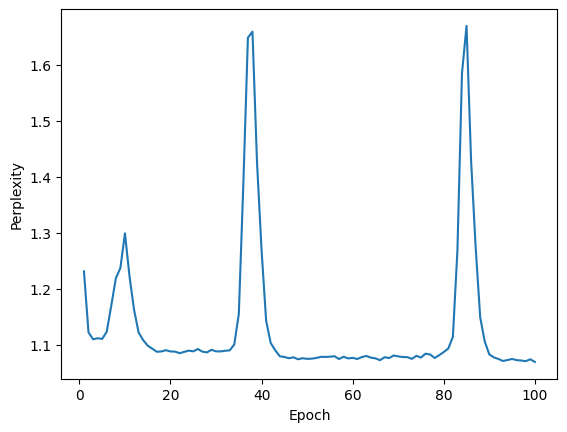

In [98]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint33 = ModelCheckpoint("next_words_part3.h5", monitor='loss', verbose=1, save_best_only=True)
model33.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001),metrics=["accuracy"])

perplexities33 = []

# Train the model and calculate perplexity at the end of each epoch
for epoch in range(100):
    history33 = model33.fit(X_train, y_train, epochs=1, batch_size=64, callbacks=[checkpoint33])
    loss33 = history33.history['loss'][0]
    perplexity33 = np.exp(loss33)
    perplexities33.append(perplexity33)
    print(f"Epoch {epoch+1}: Perplexity = {perplexity33:.2f}")

# Plot the perplexity vs epoch number
plt.plot(range(1, len(perplexities33)+1), perplexities33)
plt.xlabel('Epoch')
plt.ylabel('Perplexity')
plt.show()

In [99]:
generate_text(number_of_generate_word=50,model=model33, tokenizer=tokenizer, in_text="many are the")

1/1 [==============================] - 1s 774ms/step
<class 'str'>    hours
hours
1/1 [==============================] - 0s 36ms/step
<class 'str'>    in
in
1/1 [==============================] - 0s 23ms/step
<class 'str'>    which
which
1/1 [==============================] - 0s 23ms/step
<class 'str'>    i
i
1/1 [==============================] - 0s 22ms/step
<class 'str'>    have
have
1/1 [==============================] - 0s 23ms/step
<class 'str'>    pondered
pondered
1/1 [==============================] - 0s 23ms/step
<class 'str'>    upon
upon
1/1 [==============================] - 0s 24ms/step
<class 'str'>    the
the
1/1 [==============================] - 0s 23ms/step
<class 'str'>    story
story
1/1 [==============================] - 0s 23ms/step
<class 'str'>    that
that
1/1 [==============================] - 0s 23ms/step
<class 'str'>    is
is
1/1 [==============================] - 0s 22ms/step
<class 'str'>    set
set
1/1 [==============================] - 0s 24ms/step
<cl